# Regressão 01 - tarefa 03 - transformações em X e Y

In [5]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

import patsy
import statsmodels.api as sm

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
reg = smf.ols('tip ~ net_bill', data = tips).fit()

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [7]:
# 1. Criar a matriz de design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# 2. Ajustar o modelo
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        13:40:51   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [9]:

# 3. Remover variáveis não significativas
# Exibir os p-values
p_values = model.pvalues
print("P-values:")
print(p_values)

# Remover variáveis com p-valor maior que 0.05
significant_vars = p_values[p_values < 0.05].index
X_significant = X[significant_vars]

# Ajustar um novo modelo com as variáveis significativas
model_significant = sm.OLS(y, X_significant).fit()
print(model_significant.summary())


P-values:
Intercept         1.389032e-06
sex[T.Female]     9.824382e-01
smoker[T.No]      3.523485e-01
time[T.Dinner]    7.287609e-01
net_bill          5.764964e-22
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        13:41:07   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std e

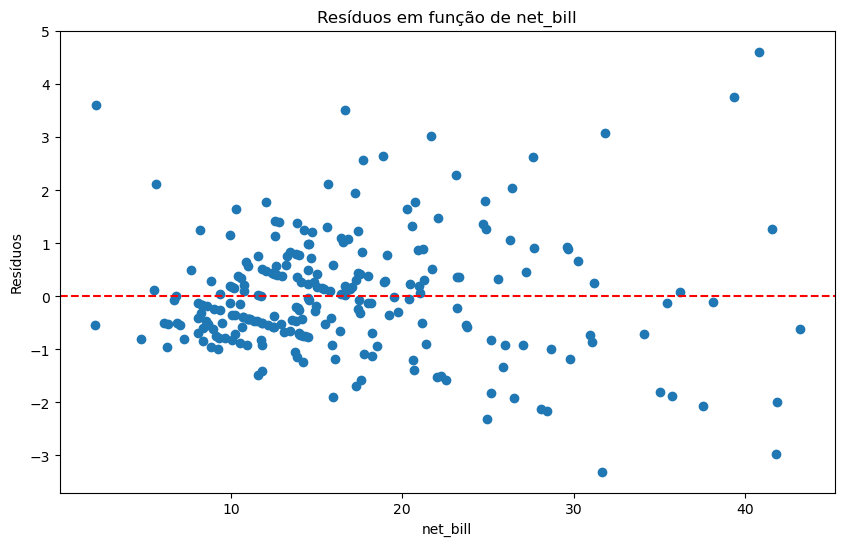

In [11]:

# 4. Gráfico de resíduos em função de net_bill
residuals = model_significant.resid
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos em função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()


In [13]:
# 5. Testar transformação de net_bill em log e polinômio
# Logar net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar modelo com log(net_bill)
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()
print("Modelo com log(net_bill):")
print(model_log.summary())


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     25.06
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.41e-17
Time:                        13:41:52   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             774.4
Df Residuals:                     239   BIC:                             791.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [14]:

# Ajustar modelo com um polinômio de net_bill (de grau 2)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()
print("Modelo com polinômio de net_bill:")
print(model_poly.summary())



Modelo com polinômio de net_bill:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     24.15
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.22e-19
Time:                        13:41:59   Log-Likelihood:                -374.88
No. Observations:                 244   AIC:                             761.8
Df Residuals:                     238   BIC:                             782.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interc

In [15]:
# 6. Comparar R² dos modelos
print(f'R² Modelo Original: {model_significant.rsquared:.4f}')
print(f'R² Modelo Log: {model_log.rsquared:.4f}')
print(f'R² Modelo Polinômio: {model_poly.rsquared:.4f}')

R² Modelo Original: 0.3325
R² Modelo Log: 0.2955
R² Modelo Polinômio: 0.3366


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [16]:
# Calcular o percentual da gorjeta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# 1. Criar a matriz de design para log(tip_pct)
y_log, X_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# 2. Ajustar o modelo
model_log = sm.OLS(y_log, X_log).fit()

# Exibir o resumo do modelo
print("Modelo para log(tip_pct):")
print(model_log.summary())

# 3. Remover variáveis não significativas
# Exibir os p-values
p_values_log = model_log.pvalues
print("P-values para log(tip_pct):")
print(p_values_log)

# Remover variáveis com p-valor maior que 0.05
significant_vars_log = p_values_log[p_values_log < 0.05].index
X_significant_log = X_log[significant_vars_log]

# Ajustar um novo modelo com as variáveis significativas
model_significant_log = sm.OLS(y_log, X_significant_log).fit()
print("Modelo ajustado com variáveis significativas para log(tip_pct):")
print(model_significant_log.summary())

Modelo para log(tip_pct):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           3.16e-13
Time:                        13:43:03   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

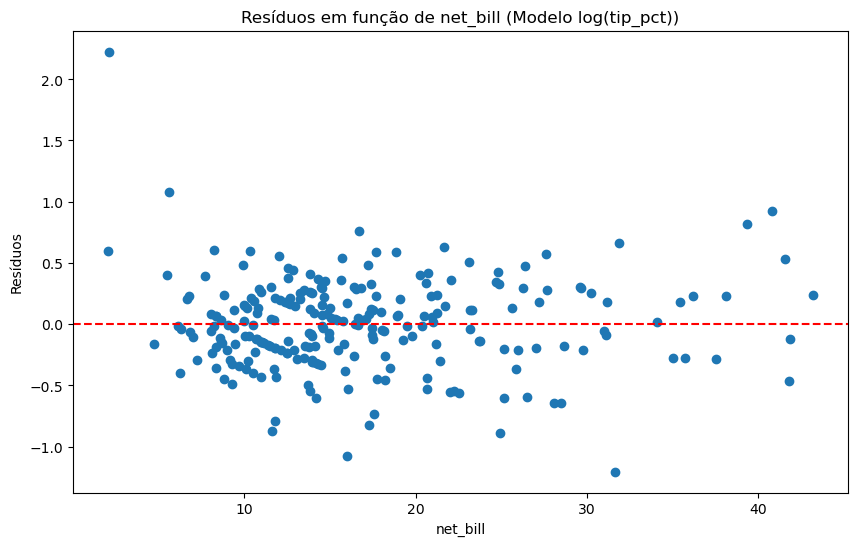

In [17]:
# 4. Gráfico de resíduos em função de net_bill
residuals_log = model_significant_log.resid
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos em função de net_bill (Modelo log(tip_pct))')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

In [19]:

# 5. Testar transformação de net_bill em log e polinômio
# Logar net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar modelo com log(net_bill)
y_log_log, X_log_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + log_net_bill', data=tips, return_type='dataframe')
model_log_log = sm.OLS(y_log_log, X_log_log).fit()
print("Modelo com log(net_bill):")
print(model_log_log.summary())

# Ajustar modelo com um polinômio de net_bill (de grau 2)
tips['net_bill_squared'] = tips['net_bill'] ** 2
y_poly_log, X_poly_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly_log = sm.OLS(y_poly_log, X_poly_log).fit()
print("Modelo com polinômio de net_bill:")
print(model_poly_log.summary())


Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     24.92
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.94e-17
Time:                        13:44:06   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

In [21]:

# 6. Comparar R² dos modelos
print(f'R² Modelo Significativo (log(tip_pct)): {model_significant_log.rsquared:.4f}')
print(f'R² Modelo Log (log(tip_pct)): {model_log_log.rsquared:.4f}')
print(f'R² Modelo Polinômio (log(tip_pct)): {model_poly_log.rsquared:.4f}')

# Calcular R² do modelo final em tip_pct
# Primeiro, obtendo os preditivos para o modelo final
tips['pred_log_tip_pct'] = model_poly_log.fittedvalues

# Convertendo os valores preditivos de volta para tip_pct
tips['pred_tip_pct'] = np.exp(tips['pred_log_tip_pct'])

# Calcular o R² para o modelo em tip_pct
r2_tip_pct_final = r2_score(tips['tip_pct'], tips['pred_tip_pct'])
print(f'R² do modelo final em tip_pct: {r2_tip_pct_final:.4f}')

# Comparar com o modelo do item 1
print(f'R² do modelo original (tip_pct): {model_significant.rsquared:.4f}')  

R² Modelo Significativo (log(tip_pct)): 0.2353
R² Modelo Log (log(tip_pct)): 0.2943
R² Modelo Polinômio (log(tip_pct)): 0.2611
R² do modelo final em tip_pct: 0.1353
R² do modelo original (tip_pct): 0.3325


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [40]:
# 1. Carregar a base de dados
data = pd.read_csv('../resources/previsao_de_renda(1).csv')

# Exibir as primeiras linhas do dataframe
print(data.head())

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

In [43]:
# Verificar se há valores ausentes
print(data.isnull().sum())

# Remover observações com valores ausentes nas colunas relevantes
data_clean = data.dropna(subset=['renda', 'tempo_emprego'])

# Ajustar o modelo novamente com os dados limpos
model_simple = smf.ols('renda ~ tempo_emprego', data=data_clean).fit()

# Exibir o resumo do modelo
print("Resumo do modelo de regressão linear simples:")
print(model_simple.summary())



Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
Resumo do modelo de regressão linear simples:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:51:00   Log-Likelihood:            -1.2963e+05
No. Observations:

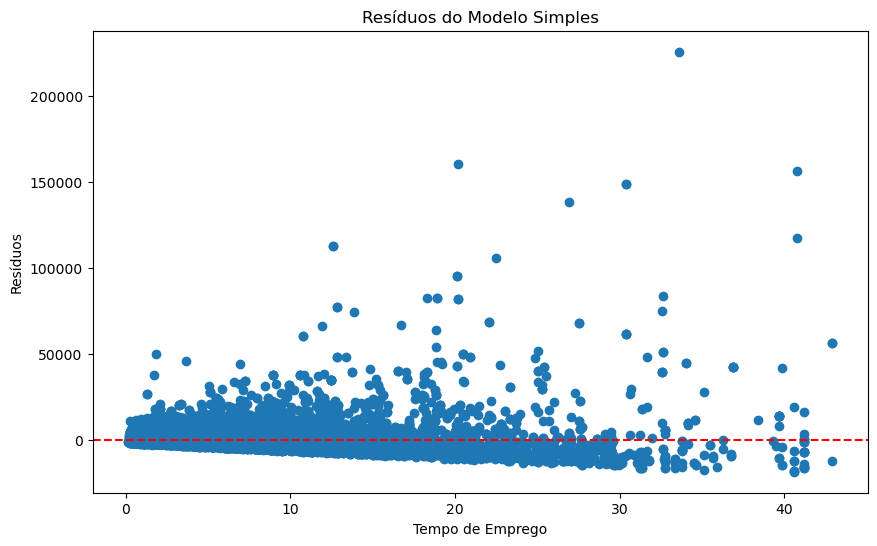

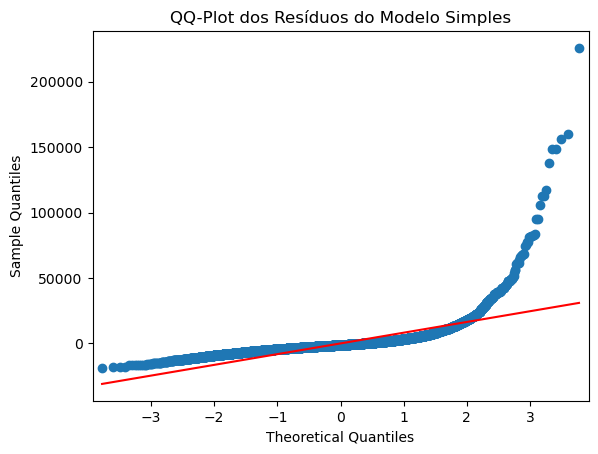

In [44]:

# Analisar os resíduos do modelo simples
residuals_simple = model_simple.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['tempo_emprego'], residuals_simple)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos do Modelo Simples')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()

# Análise de resíduos: QQ-plot
sm.qqplot(residuals_simple, line='s')
plt.title('QQ-Plot dos Resíduos do Modelo Simples')
plt.show()

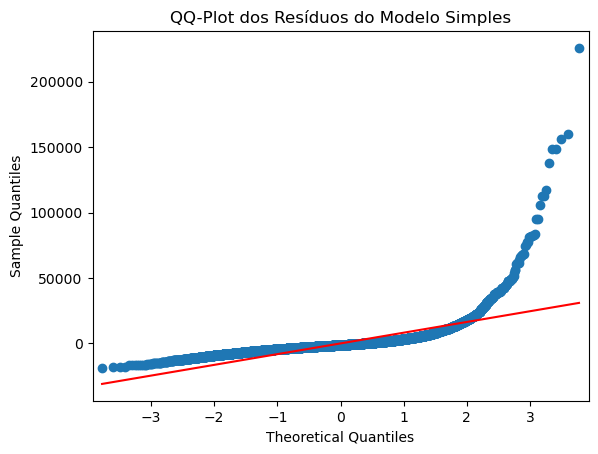

In [45]:
# Análise de resíduos: QQ-plot
sm.qqplot(residuals_simple, line='s')
plt.title('QQ-Plot dos Resíduos do Modelo Simples')
plt.show()

# 4. Ajustar um modelo de regressão linear múltipla
model_multiple = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=data).fit()


In [46]:
# Exibir o resumo do modelo
print("Resumo do modelo de regressão linear múltipla:")
print(model_multiple.summary())

Resumo do modelo de regressão linear múltipla:
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:51:09   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [49]:
# Ensure categorical variables are encoded properly
data['posse_de_imovel'] = data['posse_de_imovel'].astype('category')
data['posse_de_veiculo'] = data['posse_de_veiculo'].astype('category')
data['sexo'] = data['sexo'].astype('category')
data['tipo_renda'] = data['tipo_renda'].astype('category')
data['estado_civil'] = data['estado_civil'].astype('category')
data['tipo_residencia'] = data['tipo_residencia'].astype('category')

# Adjust the model as before
model_multiple = smf.ols('renda ~ sexo + smoker + diner + net_bill', data=data).fit()

# Print the summary
print("Resumo do modelo inicial:")
print(model_multiple.summary())

# Remove non-significant variables and fit the model again
p_values_multiple = model_multiple.pvalues
significant_vars = p_values_multiple[p_values_multiple < 0.05].index

# Print significant variables for debugging
print("Variáveis significativas:", significant_vars)

# Create formula for the refined model
# Make sure to exclude the intercept term if it’s included in significant_vars
formula = 'renda ~ ' + ' + '.join(significant_vars[1:])  # Exclude intercept

# Debug: Print the formula to check for issues
print("Fórmula do modelo refinado:", formula)

# Fit the refined model
model_refined = smf.ols(formula, data=data).fit()

# Display the refined model summary
print("Resumo do modelo refinado:")
print(model_refined.summary())


PatsyError: Error evaluating factor: NameError: name 'diner' is not defined
    renda ~ sexo + smoker + diner + net_bill
                            ^^^^^

In [34]:
# 6. Analisar os resíduos do modelo refinado
residuals_refined = model_refined.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(model_refined.fittedvalues, residuals_refined)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos do Modelo Refinado')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

# QQ-plot para os resíduos do modelo refinado
sm.qqplot(residuals_refined, line='s')
plt.title('QQ-Plot dos Resíduos do Modelo Refinado')
plt.show()


NameError: name 'model_refined' is not defined

In [35]:

# Avaliar a qualidade do ajuste
print(f'R² do modelo refinado: {model_refined.rsquared:.4f}')

NameError: name 'model_refined' is not defined